## Reference check for number of targets in GameSession table

*import libraries*

In [1]:
import os
import sys
import glob
import sqlite3 as sl

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import statistics


In [2]:
pd.options.display.max_rows = 100

In [3]:
path = './data/P00' 

In [4]:
# loop dfs from *.txt
list_of_dfs = []

list_of_dfs = [pd.read_csv(filename) for filename in glob.glob(path + '*_targets.txt')]

In [5]:
list_of_dfs[0].head()

,PatientID,Score,Strength,Coordination,Agility,SessionTime,SessionID,NumberOfTargets,CreatedDate
0,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,321.0,25.078125,42.999474,-1345.362652,10.554035,TTSH-CHISELuUvzJG4jtU2x7LwcnIDtVA==,128,2022-03-03 02:57:50
1,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,1596.0,49.322033,47.664755,15.144465,19.592974,TTSH-CHISELATu6AXcc2ECeDZLmfzceLg==,297,2022-03-03 03:26:48
2,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,113.0,40.000000,34.992334,68.233155,1.553366,TTSH-CHISELfAPnD90VIUqaw/UOUhAk2g==,33,2022-03-03 09:09:13
3,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,181.0,61.428570,35.354460,33.024178,1.496792,TTSH-CHISELPFPihGOPo0a+Me0oGLM1Yw==,33,2022-03-03 09:37:54
4,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,161.0,42.500000,36.089092,16.874067,2.595096,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,38,2022-03-10 03:17:21


**patient dictionary**

In [6]:
user_id_dict = {
    'TTSH-CHISELRGgLPwL3Lk6JTgBaVP4bjg==':'Test_01',
    'TTSH-CHISEL2gpumVcbJE267TKKceWbOA==':'NULL', 
    'TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==':'001', 
    'TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==':'002',
    'TTSH-CHISELamITRYYb9UymNH+3xzylgg==':'003', 
    'TTSH-CHISEL6IRO4pIMDUCpIRFbGnO26w==':'004',
    'TTSH-CHISELZSJj4EGZh0iiozqhx3Gf4g==':'005',
    'TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==':'006'
}; 


In [7]:
list_of_groupsessions = []
for df in list_of_dfs:
    df.replace({'PatientID':user_id_dict},inplace=True)
    df['date_time'] = pd.to_datetime(df['CreatedDate'], format='%Y-%m-%d %H:%M:%S')
    df['just_date'] = df['date_time'].dt.date
    
    groupsession = df.groupby(['just_date']).sum().reset_index()
    list_of_groupsessions.append(groupsession)

In [8]:
list_of_groupsessions[0]

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-03-03,2211.0,175.828728,161.011024,-1228.960854,33.197168,491
1,2022-03-10,2934.0,173.929615,167.369573,-233.032904,51.714651,654
2,2022-03-11,219.0,20.769230,47.588621,20.684547,10.493445,105
3,2022-03-12,4042.0,175.223047,151.330928,73.707095,61.658001,878
4,2022-03-15,2301.0,158.976776,149.103749,-524.591759,31.536377,467
5,2022-03-17,2476.0,53.779697,49.239704,-814.104143,1346.632446,562
6,2022-03-21,3462.0,150.215042,104.382799,29.691547,51.542343,671
7,2022-03-22,2078.0,70.103806,48.287907,-327.145745,32.187260,409
8,2022-03-23,1949.0,76.688744,48.094645,23.666030,31.400736,402
9,2022-03-24,920.0,352.603004,209.353268,-1823.030661,20.182383,193


### display sessions

#### P001

In [9]:
list_of_groupsessions[0]

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-03-03,2211.0,175.828728,161.011024,-1228.960854,33.197168,491
1,2022-03-10,2934.0,173.929615,167.369573,-233.032904,51.714651,654
2,2022-03-11,219.0,20.769230,47.588621,20.684547,10.493445,105
3,2022-03-12,4042.0,175.223047,151.330928,73.707095,61.658001,878
4,2022-03-15,2301.0,158.976776,149.103749,-524.591759,31.536377,467
5,2022-03-17,2476.0,53.779697,49.239704,-814.104143,1346.632446,562
6,2022-03-21,3462.0,150.215042,104.382799,29.691547,51.542343,671
7,2022-03-22,2078.0,70.103806,48.287907,-327.145745,32.187260,409
8,2022-03-23,1949.0,76.688744,48.094645,23.666030,31.400736,402
9,2022-03-24,920.0,352.603004,209.353268,-1823.030661,20.182383,193


#### P002

In [10]:
list_of_groupsessions[1]

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-03-17,1113.0,27.537689,51.412051,-263.221950,28.909433,338
1,2022-03-21,3476.0,143.573700,143.862198,-1834.368071,53.376962,733
2,2022-03-23,274.0,97.505745,76.991430,-1014.214384,1.549585,42
3,2022-03-24,8660.0,131.097561,157.825982,-514.038800,88.448853,1491
4,2022-03-25,3720.0,111.945053,88.895804,-1948.904528,41.743582,746
5,2022-03-26,9343.0,93.815788,98.425986,-527.245549,76.481487,1642
6,2022-03-27,10058.0,81.423801,151.273154,-850.185715,87.613304,1840
7,2022-03-28,12547.0,85.500000,102.692687,51.570347,81.342403,2000
8,2022-03-29,19870.0,120.571430,155.049791,-2102.688472,122.482590,3129
9,2022-03-30,13210.0,101.667519,105.399426,42.606146,81.721363,2063


#### P003

In [11]:
list_of_groupsessions[2]

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-03-07,2887.0,60.892891,47.780865,11.152730,37.157238,543
1,2022-03-09,4041.0,46.060844,48.598012,15.728225,61.677113,820
2,2022-03-10,75.0,99.000000,85.859231,84.476643,0.595276,10
3,2022-03-29,2764.0,110.808029,95.785201,-532.043447,35.775889,528
4,2022-03-30,3992.0,143.368649,146.419140,-1162.711053,54.088591,803
5,2022-03-31,5992.0,139.070541,150.280985,-704.052695,87.441004,1289
6,2022-04-01,7856.0,100.230228,98.916079,30.945592,88.455952,1443
7,2022-04-02,10198.0,98.907333,96.681555,-133.390039,116.889919,1921
8,2022-04-03,9314.0,94.322598,90.386483,-133.827328,101.776596,1799
9,2022-04-04,3907.0,46.245956,45.523977,13.052197,44.911617,772


#### P004

In [12]:
list_of_groupsessions[3]

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-04-13,445.0,23.026821,55.490927,15.008402,17.033276,150
1,2022-04-19,4309.0,54.916069,47.108695,6.238197,74.419014,923
2,2022-04-22,1155.0,70.949686,123.282390,81.731529,44.747900,460
3,2022-04-23,2272.0,233.406013,260.076341,113.785080,65.176076,808
4,2022-04-24,13145.0,218.636364,153.437131,77.064694,91.306280,1809
5,2022-04-25,8487.0,257.031647,222.054253,123.752232,149.688128,2180
6,2022-04-26,5959.0,77.194351,116.890106,105.805043,121.186707,1812
7,2022-04-27,7272.0,156.993324,231.035473,228.902447,136.221924,2258
8,2022-04-28,7112.0,74.843769,119.025097,122.577373,134.531422,2266
9,2022-04-29,10796.0,170.000000,126.348506,49.349947,112.935331,2036


#### P006

In [13]:
list_of_groupsessions[4]

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-05-13,3938.0,165.429504,175.677642,80.577710,15.488509,465
1,2022-05-14,10989.0,209.814903,128.710132,98.017300,74.442083,1797
2,2022-05-15,10889.0,169.147232,124.610520,149.006682,93.724401,2084
3,2022-05-16,12794.0,150.702850,85.400177,61.339194,89.654608,2130
4,2022-05-17,13901.0,157.728432,85.422495,106.945924,87.888329,2242
5,2022-05-18,13265.0,160.045616,83.881468,76.574235,81.420086,2100
6,2022-05-19,13661.0,200.310188,126.887923,105.649686,91.005131,2307
7,2022-05-20,10201.0,151.357819,85.145200,71.717060,72.024746,1678
8,2022-05-21,12983.0,139.742241,84.168812,97.146822,79.413845,2141
9,2022-05-23,15607.0,141.148811,84.853755,81.868207,94.468332,2519


### Plot sessions

#### Number of targets

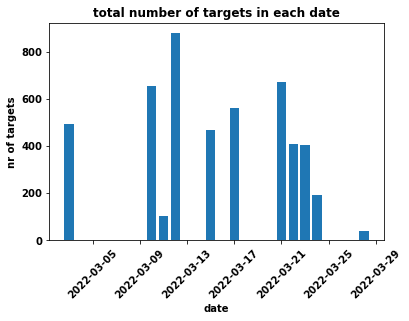

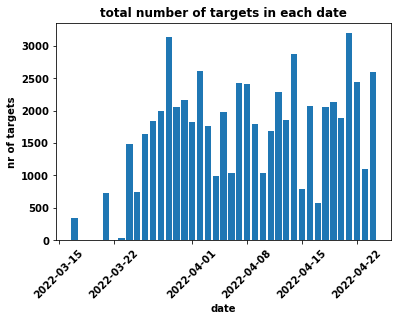

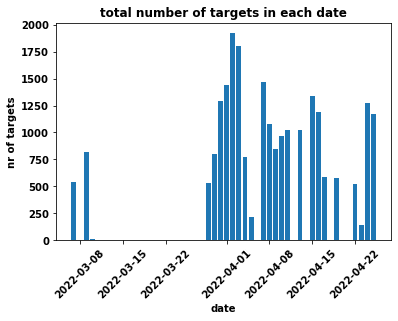

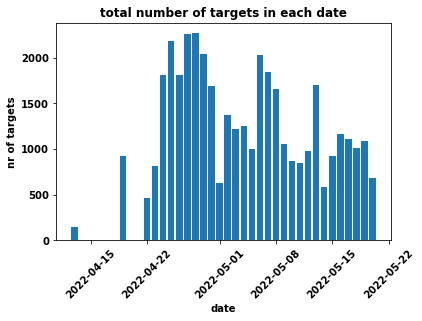

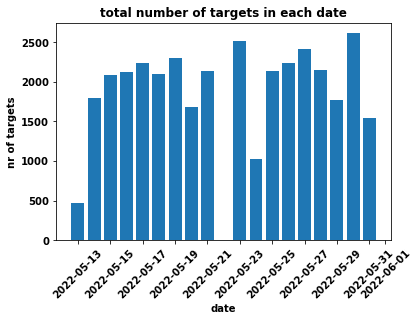

In [15]:
# plot number of targets by date
for session in list_of_groupsessions:
    plt.bar(session['just_date'],session['NumberOfTargets']);
    plt.xlabel('date')
    plt.xticks(rotation=45)
    # plt.yticks(range(0,20))
    plt.ylabel('nr of targets');
    # plt.ylim(top=1000)
    plt.title('total number of targets in each date');
    plt.show();

#### Time spend 

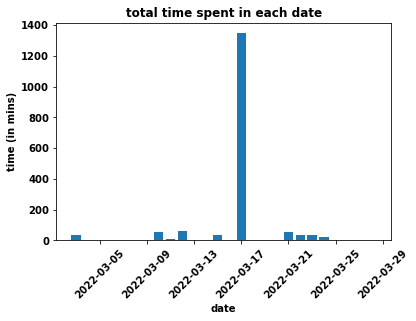

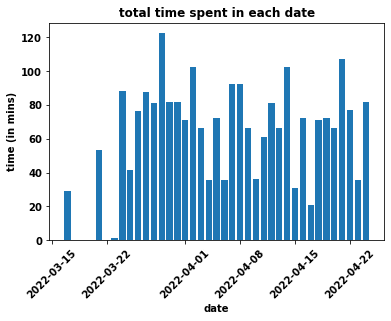

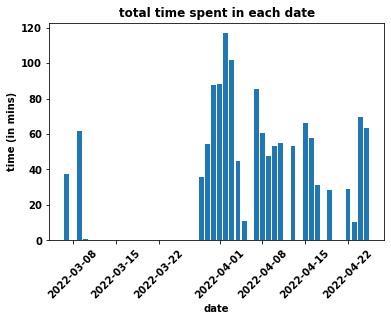

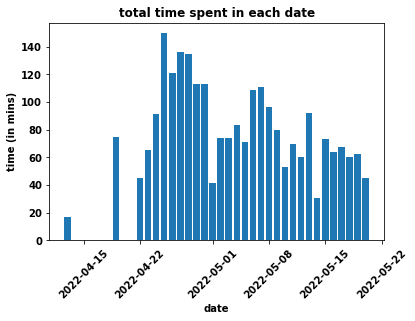

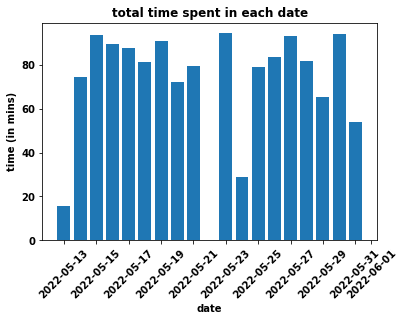

In [16]:
# plot time spent by date
for session in list_of_groupsessions:
    plt.bar(session['just_date'],session['SessionTime']);
    plt.xlabel('date')
    plt.xticks(rotation=45)
    # plt.yticks(range(0,20))
    plt.ylabel('time (in mins)');
    # plt.ylim(top=1000)
    plt.title('total time spent in each date');
    plt.show();